# US Domestic flights in 2007
## by Mohamed Ibrahim

## Preliminary Wrangling

> The dataset contain all the domestic US flights in 2007. There were also other lookup data sets for carriers and airports but for this analysis i didn't need to include it. The data set include all the flight information from time, delays in time and category and cancellation. It also include a reference to the carrier and the airports that the flight are departuring from and to

In [2]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
# Read the flight data in the US in the year 2007 into a dataframe
df = pd.read_csv('2007.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [4]:
#Understanding the columns in the flights table and the datapoints that exists
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [5]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### What is the structure of your dataset?

> There are 7,453,215 flight observations with 29 features in 2007.

### What is/are the main feature(s) of interest in your dataset?

> Delayed flights and overall delay time in terms of month, day of month, day of year and departure time

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Year, Month, DayofMonth, DayOfWeek, DepTime, ArrDelay,
       DepDelay, Distance, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay

## Data Cleaning

> In this section, i will clean some the features that i need for the analysis and also remove some columns that i don't need to speed up processing. I will also do some feature engineering for some features that i will use late on in the analysis 

In [7]:
#Set all the column names to lower case so it is easier for me to code
df.columns= df.columns.str.lower()

In [8]:
#Remove columns that are not needed in this analysis 
df.drop(columns=['flightnum', 'tailnum','cancellationcode'],inplace=True)

In [9]:
#Create an overall delay column that collect all the delay minutes from the different delay categories
df['overall_delay'] = df['carrierdelay'] +df['weatherdelay'] +df['nasdelay'] 
+ df['securitydelay'] + df['lateaircraftdelay']

0           0
1           0
2          31
3           3
4           0
           ..
7453210     0
7453211     0
7453212     0
7453213    36
7453214     0
Length: 7453215, dtype: int64

In [10]:
#Checking the data to make sure i have the correct calculations
df.overall_delay.value_counts()

0       5898967
15        63102
16        57564
17        52711
18        49209
         ...   
962           1
973           1
974           1
982           1
2580          1
Name: overall_delay, Length: 1092, dtype: int64

In [11]:
#Create a boolean column to check if the flight experienced some delay or not 
df['delayed'] = np.where(df['overall_delay']>0, True, False)
df.delayed.value_counts()

False    5898967
True     1554248
Name: delayed, dtype: int64

In [12]:
#Create a boolean column to check if the flight experienced a delay of more than 5 mins or not
df['delayed_more_than_5_mins'] = np.where(df['overall_delay']>5, True, False)
df.delayed_more_than_5_mins.value_counts()

False    6033241
True     1419974
Name: delayed_more_than_5_mins, dtype: int64

In [13]:
#Remove the minutes from the departure time column and only including the hour
conditions = [
    (df['deptime'] < 60),
    (df['deptime'] > 60) & (df['deptime'] < 160),
    (df['deptime'] > 200) & (df['deptime'] < 260),
    (df['deptime'] > 300) & (df['deptime'] < 360),
    (df['deptime'] > 400) & (df['deptime'] < 460),
    (df['deptime'] > 500) & (df['deptime'] < 560),
    (df['deptime'] > 600) & (df['deptime'] < 660),
    (df['deptime'] > 700) & (df['deptime'] < 760),
    (df['deptime'] > 800) & (df['deptime'] < 860),
    (df['deptime'] > 900) & (df['deptime'] < 960),
    (df['deptime'] > 1000) & (df['deptime'] < 1060),
    (df['deptime'] > 1100) & (df['deptime'] < 1160),
    (df['deptime'] > 1200) & (df['deptime'] < 1260),
    (df['deptime'] > 1300) & (df['deptime'] < 1360),
    (df['deptime'] > 1400) & (df['deptime'] < 1460),
    (df['deptime'] > 1500) & (df['deptime'] < 1560),
    (df['deptime'] > 1600) & (df['deptime'] < 1660),
    (df['deptime'] > 1700) & (df['deptime'] < 1760),
    (df['deptime'] > 1800) & (df['deptime'] < 1860),
    (df['deptime'] > 1900) & (df['deptime'] < 1960),
    (df['deptime'] > 2000) & (df['deptime'] < 2060),
    (df['deptime'] > 2100) & (df['deptime'] < 2160),
    (df['deptime'] > 2200) & (df['deptime'] < 2260),
    (df['deptime'] > 2300) & (df['deptime'] < 2360)
    ]


values = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

# create a new column and use np.select to assign values to it using our lists as arguments
df['deptime'] = np.select(conditions, values)

In [14]:
#checking to see that the calculations are correct
df.deptime.value_counts()

8     465628
11    458943
17    454350
6     452932
9     446579
13    446397
7     446019
16    444424
10    441946
12    437423
14    428582
15    427605
18    415947
19    409921
0     381163
20    307050
21    260487
5     133155
22    126631
23     55110
1       6794
4       3250
2       2228
3        651
Name: deptime, dtype: int64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [15]:
# Making the figure bigger so it is easier to see trends
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8

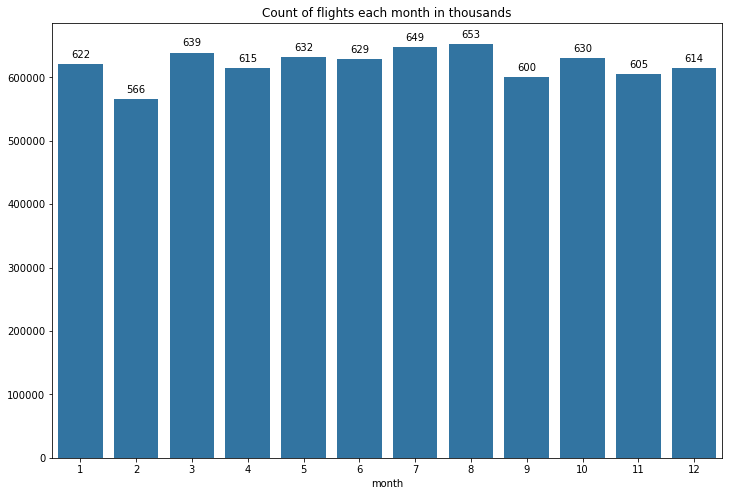

In [18]:
#First is to understand if there is any seasonality with the number of flights per month

pok_color = sns.color_palette()[0]
sns.countplot(data=df,x='month',color=pok_color);
plt.ylabel("");
plt.title('Count of flights each month in thousands');

#Setting the labels
flights_count = df.month.value_counts(sort=False)
for i in flights_count.index:
    count = flights_count[i]/1000
    plt.text(i-1,(count*1000)+10000, round(count), ha = 'center');



> There is no clear seasonality in terms of number of flightst per month. Lowest month in terms of number of flights is Feburary and highest month is Auguest/July. There is a spike in the month of March. it may be due to easter holiday. I will be exploring the number of flights on a day of month and day of week next to understand if there is any seasonality there

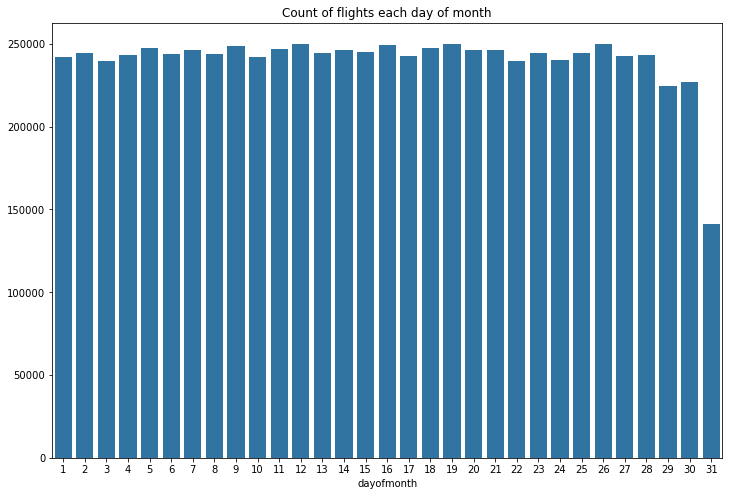

In [19]:
#Get the number distibution of flights each day of month to understand the ditribution of the number of flights

pok_color = sns.color_palette()[0]
sns.countplot(data=df,x='dayofmonth',color=pok_color);
plt.ylabel("");
plt.title('Count of flights each day of month');

> There is no indication that flights tend to increase going to the end of the month. There is a slight drop happening on Day 29,30,31 and this is attributed to the month of Feburary being 28 days and only 6 months in the year have 31 days

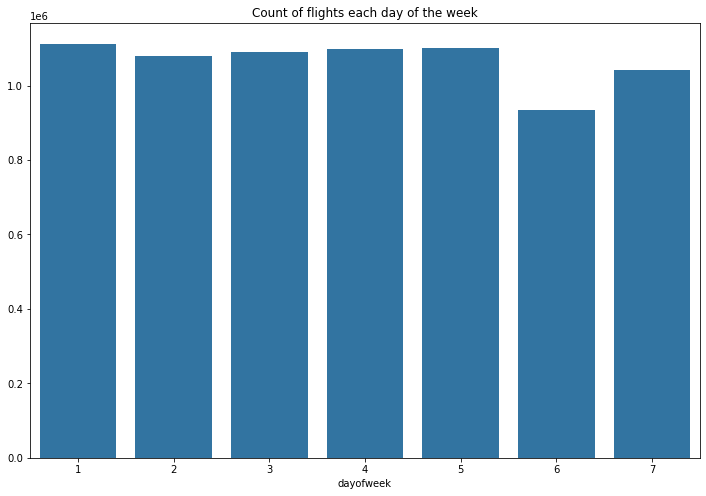

In [20]:
#Get the number distibution of flights each day of the week to understand the ditribution of the number of flights

pok_color = sns.color_palette()[0]
sns.countplot(data=df,x='dayofweek',color=pok_color);
plt.ylabel("");
plt.title('Count of flights each day of the week');

> The data shows that the number of flights in the week show an increase from Tuesday till Friday and then drop significantly on Saturday and get back up again on Sunday. The busiest day is Monday. Next, i will try to understand more about the delays in these fligths

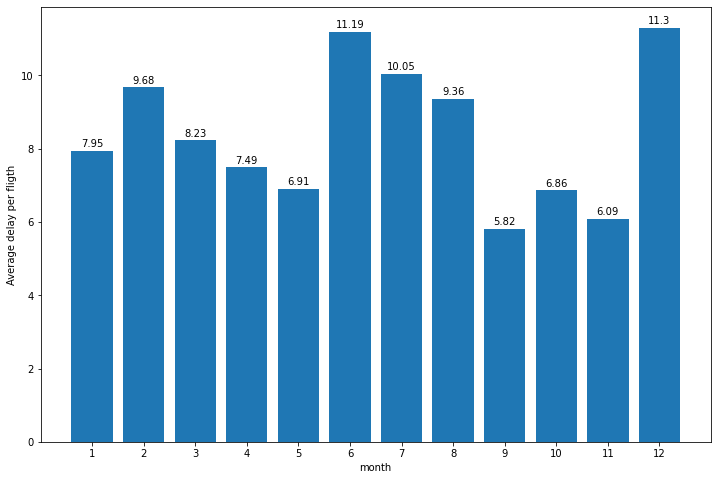

In [22]:
#Check the average delay per flight each month  
x = df.month.unique()

# Return the Series having frequency count of each unique value
y = df.groupby('month').mean()['overall_delay']

plt.bar(x, y)

# Labeling the axes
plt.xlabel('month')
plt.ylabel('Average delay per fligth')

#Showing the x ticks 
plt.xticks(x);


for i in y.index:
    count = y[i]
    plt.text(i,count+0.1, round(count,2), ha = 'center');


> The average delay per flight each month is different with highs during the two months of June and December. However this data is including all flights and not just the delayed ones. I will ecplore next the percentage of delayed flights to all fligths

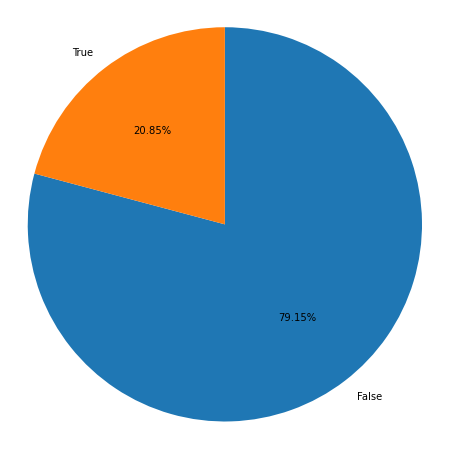

In [23]:
#checking how many flights are experiencing delays compared to all flights
#Do the proportions calculations
sorted_counts = df['delayed'].value_counts() / df.shape[0]
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%.2f%%');
plt.axis('square');

> It looks like ~20% of all flights are experiencing delays. I wonder how many of these delays are neglicable like less than 5 mins

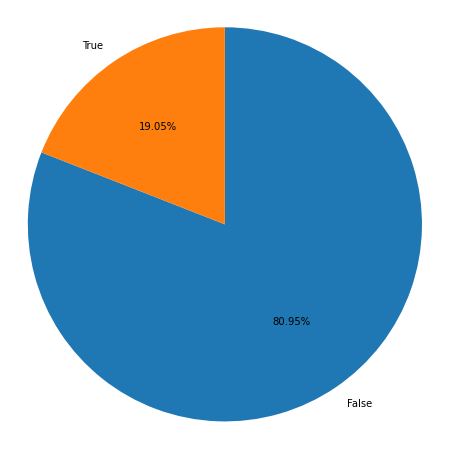

In [24]:
#checking how many flights are experiencing delays of more than 5 mins compared to all flights
#Do the proportions calculations
sorted_counts_5_mins = df['delayed_more_than_5_mins'].value_counts() / df.shape[0]
plt.pie(sorted_counts_5_mins, labels = sorted_counts_5_mins.index, startangle = 90, counterclock = False,autopct='%.2f%%');
plt.axis('square');

> it looks like ~20% of all flights are experiencing delays with ~19% experiencing more than 5 mins delays. With only 20% of the flights being delayed, i will focus more on delayed flights so the statistics are not affected by on-time flights

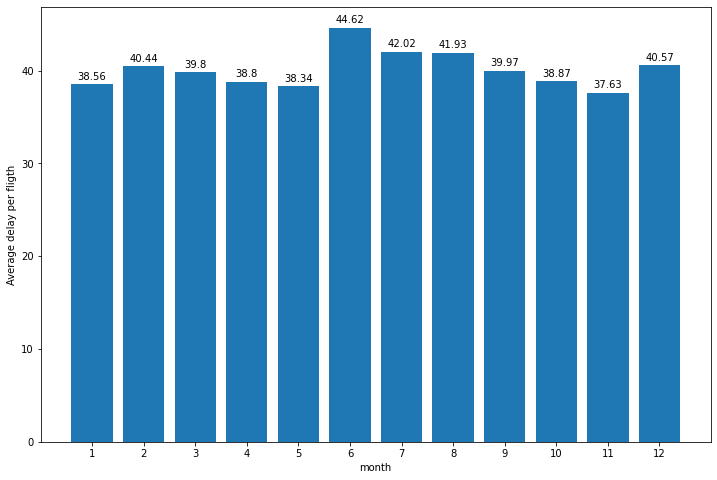

In [25]:
#Understanding the average delay per flight each month for only flights that had delays
#Create a subset of the data for flights that experienced delays
df_delayed = df[df['delayed']].copy()
x = df_delayed.month.unique()

# Return the Series having frequency count of each unique value
y = df_delayed.groupby('month').mean()['overall_delay']
plt.bar(x, y)
# Labeling the axes
plt.xlabel('month')
plt.ylabel('Average delay per fligth')
plt.xticks(x);

for i in y.index:
    count = y[i]
    plt.text(i,count+0.5, round(count,2), ha = 'center');

> The average delay per flight seems to be at highest in June and show a down trend from there till November. The lowest month is November. Next, i will explore the distribution of delays across different date/time features to understand if there is a relationship between them

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of flights looks normal with no clear trends other than normal seasonality. Similar situation is observed for day of month and day of week.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  Calculating the average delay per flight for the whole dataset showed interseting distribution. This distribution lead me to try to understand more about the percentage of delayed flights to all flights. Upon discovering that only 20% of the flights are delayed, i decided to make a subset of the data just for delayed flightst so that the calculations are not affected by on-time flights.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

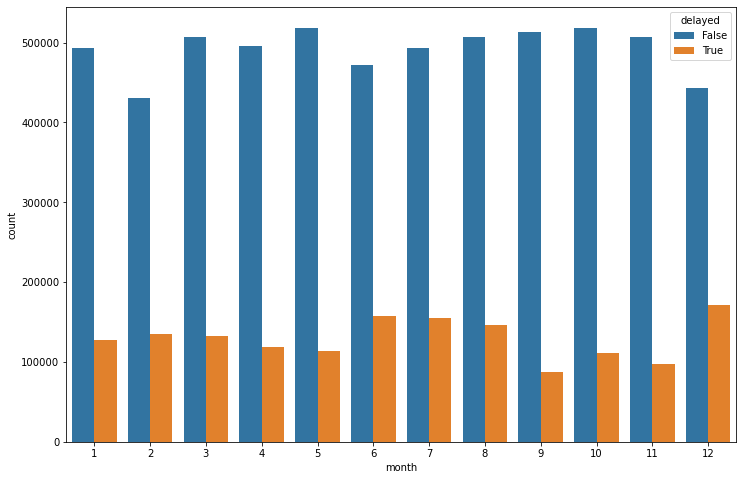

In [30]:
#Getting the number of flights which are delayed to the number of flights which are not delayed
sns.countplot(data = df, x = 'month', hue = 'delayed');

> Looking at the trend in the number of delayed flights and number of on time flights, we see that there is a much higher change that you will have a delayed flight in December than in Septemper. 

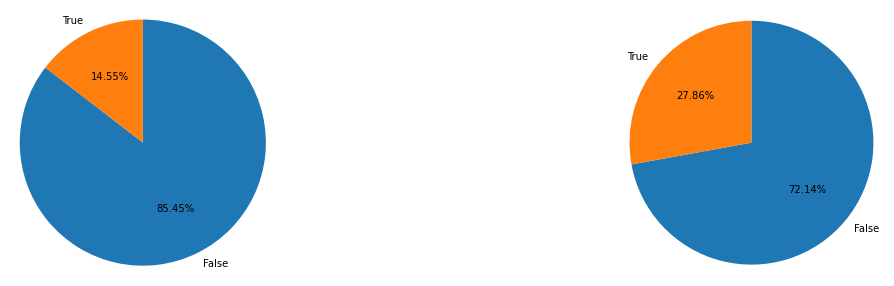

In [31]:
#With the difference in the number of delayed flights per month and number of on-time flights
#I wanted to explore how this differnece differ from two months (especially september as it has the lowest number of delayed flights)
plt.figure(figsize = [20, 5])

# Pie plot ON LEFT: Septemper
plt.subplot(1, 2, 1)

sep_fligths = df[df['month']==9].delayed.value_counts() / df[df['month']==9].shape[0]

plt.pie(sep_fligths, labels = sep_fligths.index, startangle = 90, counterclock = False,autopct='%.2f%%');
plt.axis('square');

# Pie plot ON Right: December
plt.subplot(1, 2, 2)

dec_fligths = df[df['month']==12].delayed.value_counts() / df[df['month']==12].shape[0]

plt.pie(dec_fligths, labels = dec_fligths.index, startangle = 90, counterclock = False,autopct='%.2f%%');
plt.axis('square');

> It is interesting to know that there is 2x the chance that a flight will exprience a delay in December than in September. Next i will explore if the chance to have a delayed flight differs from one day in the week to another

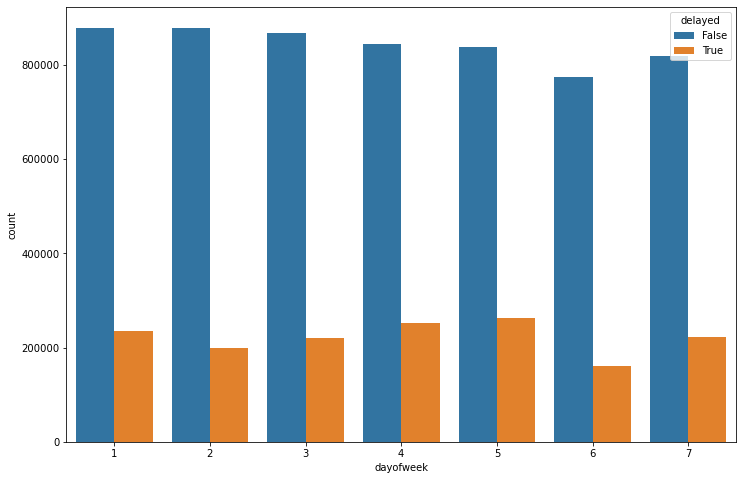

In [32]:
#Getting the number of flights which are delayed to the number of flights which are not delayed by week day
sns.countplot(data = df, x = 'dayofweek', hue = 'delayed');

> Along with similar situation like the month, a percentage of a flight being delayed differ from one day in the week to another. Also the percentage of flights with delays to all flights seem to increase going from Tuesday till it reaches it highest point in the week on Friday. I will do the same for day of month

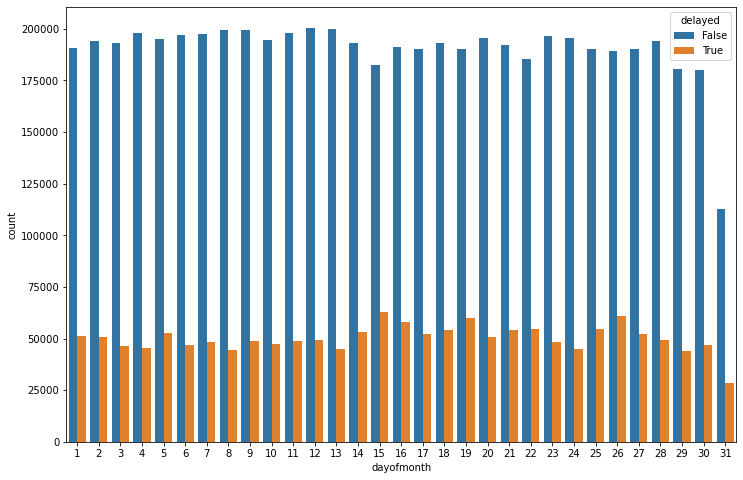

In [33]:
#Getting the number of flights which are delayed to the number of flights which are not delayed by day of month
sns.countplot(data = df, x = 'dayofmonth', hue = 'delayed');

> There is no apparent difference by day of month. Next, i will explore the distribution of delays in mintues

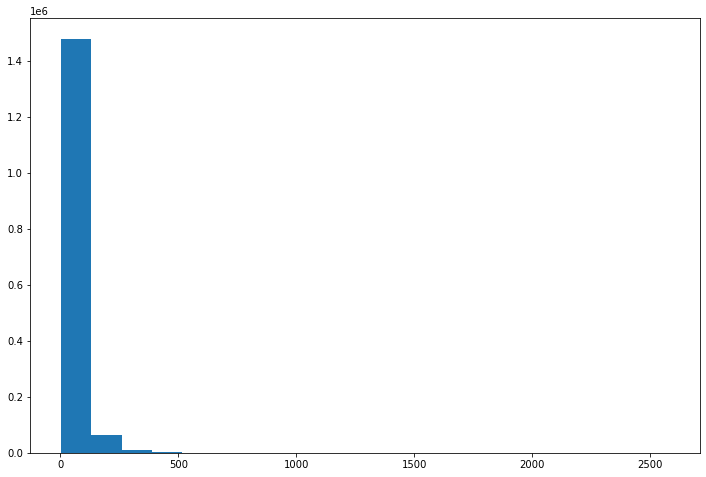

In [26]:
# To understand more about the delays i will explore the delays distribution and average delays 
plt.hist(data = df_delayed, x = 'overall_delay', bins = 20);

In [27]:
#With the distribution almost all below 500, i will need to fix the scales
df_delayed.overall_delay.describe()


count    1.554248e+06
mean     4.037247e+01
std      5.106540e+01
min      1.000000e+00
25%      1.600000e+01
50%      2.500000e+01
75%      4.700000e+01
max      2.580000e+03
Name: overall_delay, dtype: float64

In [28]:
len(df_delayed[df_delayed['overall_delay']>500])/df_delayed.shape[0]*100

0.10892727544124232

40.372468872406465 25.0


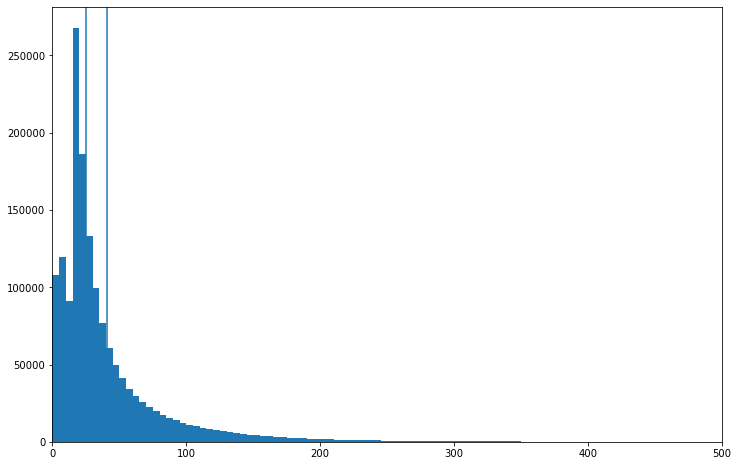

In [29]:
#Adjusting the axis to remove the outliers and get an understanding of the delay
bins = np.arange(0, 500, 5)
plt.hist(data = df_delayed, x = 'overall_delay', bins = bins);
plt.xlim((0,500));
plt.axvline(df_delayed.overall_delay.mean());
plt.axvline(df_delayed.overall_delay.median());

print (df_delayed.overall_delay.mean() ,df_delayed.overall_delay.median())

> As expected delays are skewed to the right with some outliers in the data. Also the average delay is 40mins but this is affected by the outliers. The median delay time is 25 mins. Next i will explore this distribution for all the features that i included in my analysis 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The chace of a flight experiencing a delay is different from one month to another and from one day of the week to another. Also flight delays are very right skewed with an average of 45 mins and a median of 25 mins. The difference between the median and average show that there are some outlier in the data

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

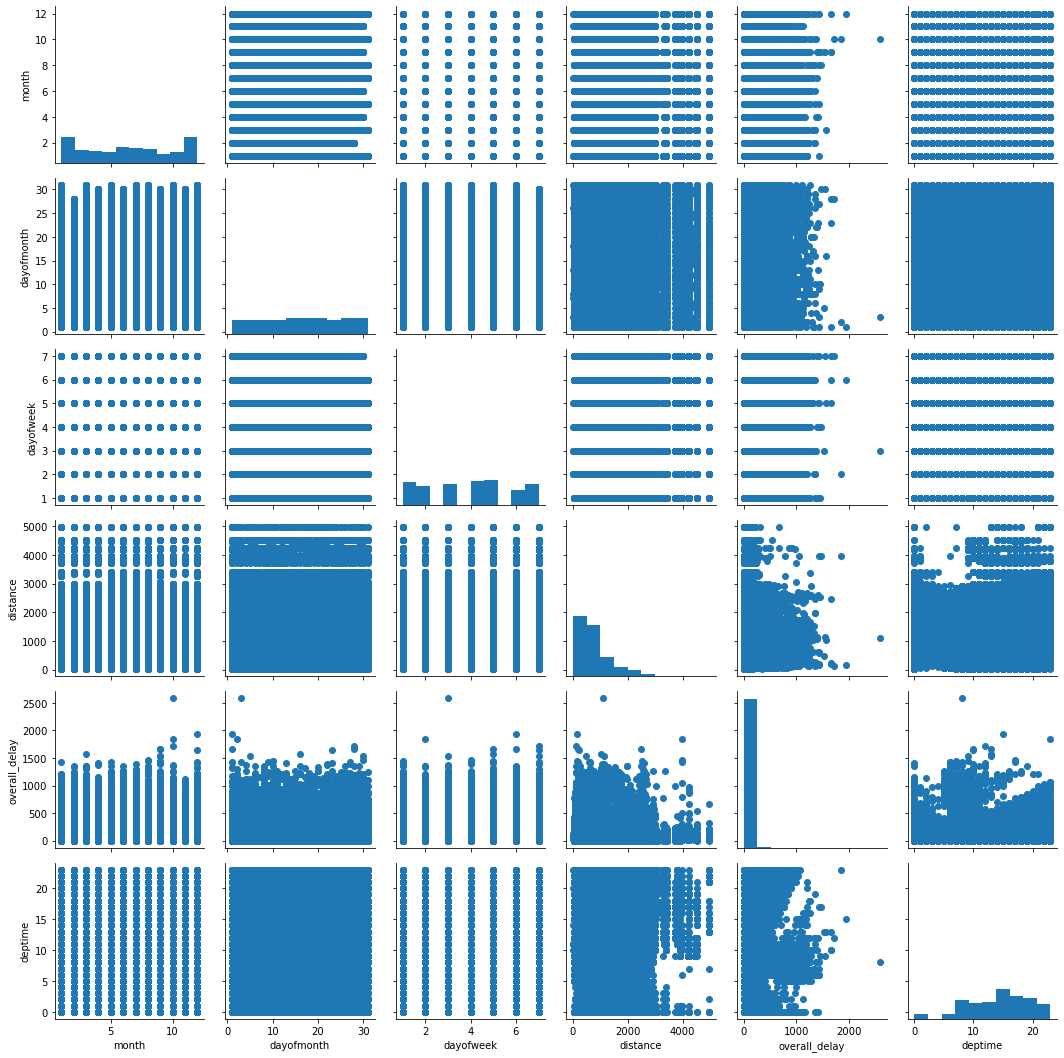

In [36]:
#i will use plot matrics to give me an overview of any relationships that i may not be seeing
#Will also use the histogram for the diagonal to get an understanding the of the distribution for other features
#Plot a scatter plot matrix to understand if there are any correlation between incease in delay and other metrics
scatter_variables = ["month", "dayofmonth", "dayofweek","distance","overall_delay","deptime",]

f = sns.PairGrid(data=df_delayed, vars=scatter_variables)
f.map_diag(plt.hist)
f.map_offdiag(plt.scatter);

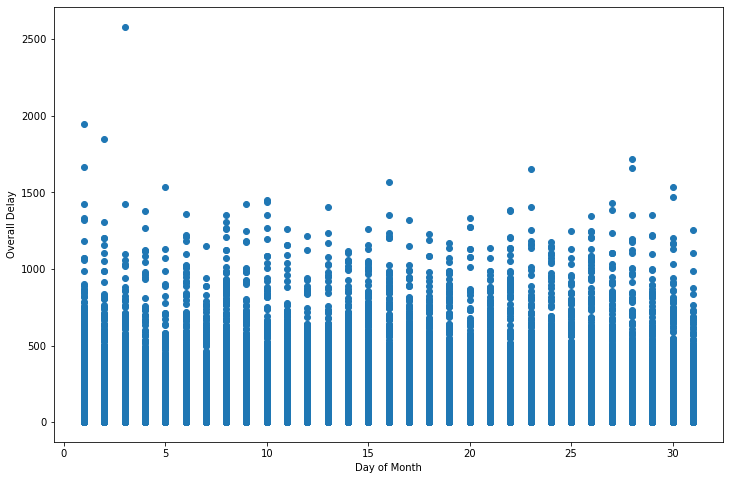

In [37]:
#plotting the relationship between day of month and overall delay
plt.scatter(data=df_delayed, x="dayofmonth", y="overall_delay")
plt.xlabel("Day of Month") 
plt.ylabel("Overall Delay");

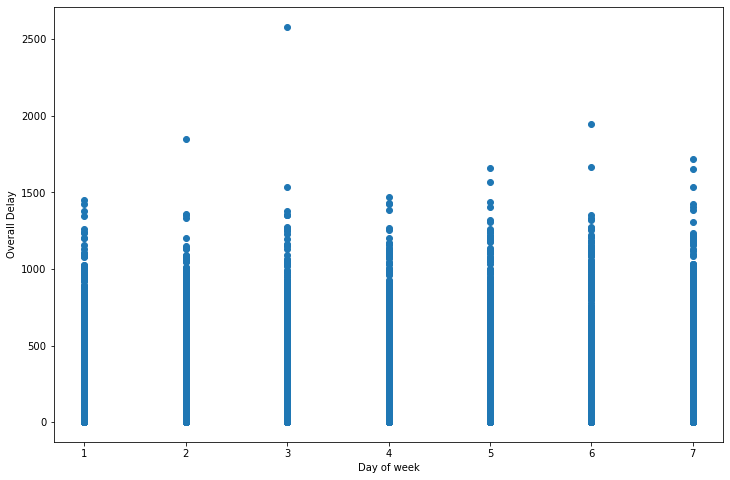

In [38]:
#plotting the relationship between day of month and overall delay
plt.scatter(data=df_delayed, x="dayofweek", y="overall_delay")
plt.xlabel("Day of week") 
plt.ylabel("Overall Delay");

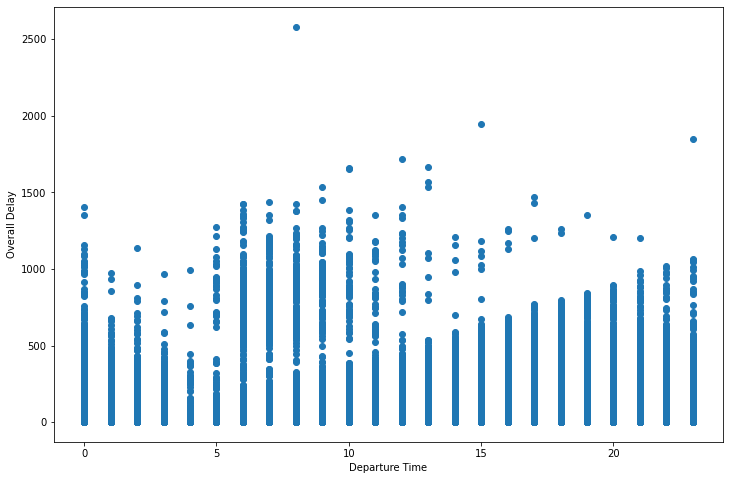

In [39]:
#plotting the relationship between day of month and overall delay
plt.scatter(data=df_delayed, x="deptime", y="overall_delay")
plt.xlabel("Departure Time") 
plt.ylabel("Overall Delay");

> The only relation that stands from the previous plots is the relationship between the departure time and average delays. It looks like early morning flights experience higher delays than afternoon flights. Next i will explore this feature more

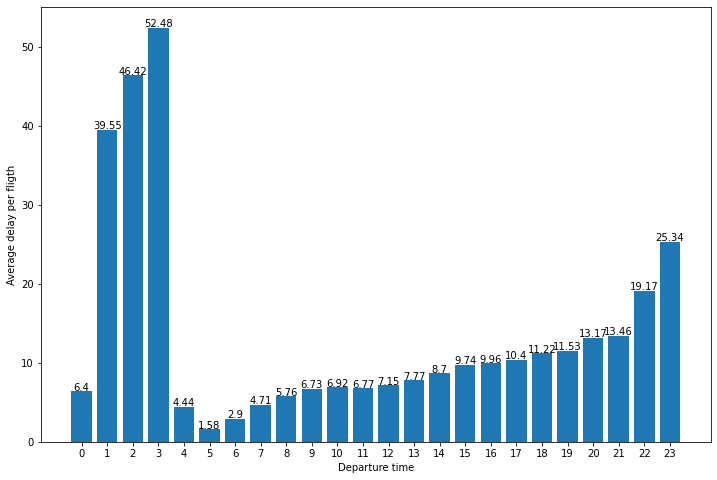

In [40]:
#Understanding the average delay per flight for departing hour 
x = df.groupby('deptime').mean()['overall_delay'].index

# Return the Series having frequency count of each unique value
y = df.groupby('deptime').mean()['overall_delay']

plt.bar(x, y)

# Labeling the axes
plt.xlabel('Departure time')
plt.ylabel('Average delay per fligth')

plt.xticks(x);


for i in y.index:
    count = y[i]
    plt.text(i,count+0.1, round(count,2), ha = 'center');


> At first look, it look like flights in the early morning (from 1 in the morning to 3 in the morning) have insanly higher average delay per flight. However, there are very few number of flights in this period to make a concerete conclusion. what is more interesting is that average delays tend to increase with departure time

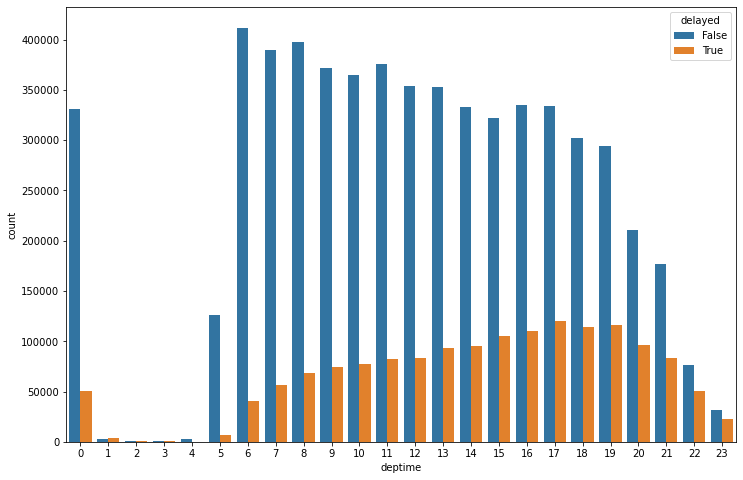

In [41]:
#Getting the number of flights which are delayed to the number of flights which are not delayed by departure hour
sns.countplot(data = df, x = 'deptime', hue = 'delayed');

> Not only that average delay in minutes increase from morning flights to evening flights, but also the chance that a flight will experience a delay increases too

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The delay time and a chance of having a delayed flight increases steadly from the morning flights to evening flights

### Were there any interesting or surprising interactions between features?

> The time of departure for the flight is the only feature that show a steady relationship with flight delays. Passengers who don't want to experience flight delays should try to book their flights to depart in the morning and try to book in September to get the best chance of not expreincing a delay